In [27]:
# This code illustrates how we can use seqeuntial API for building a neural netwrok for a regression example. 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [29]:
data=pd.read_csv("test.csv")#data set was uploaded to the working environemnt content  folder. This file contains x and y values.

In [30]:
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [31]:
data.shape

(300, 2)

In [32]:
x=data['x']
y=data['y']

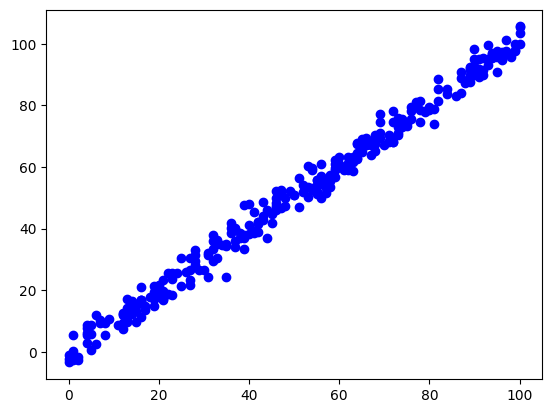

In [33]:
plt.scatter(x,y,c='b')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

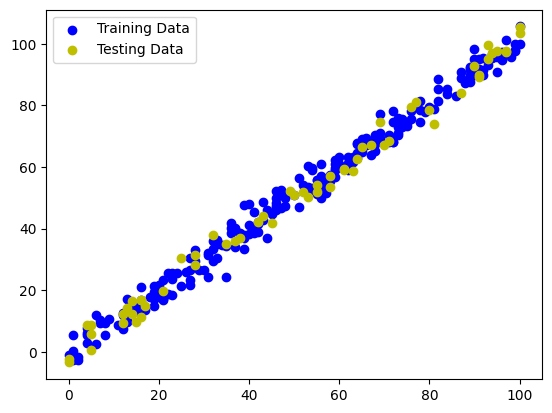

In [35]:
plt.scatter(X_train,y_train,c='b',label="Training Data")
plt.scatter(X_test,y_test,c='y',label="Testing Data")
plt.legend()
plt.show()

In [36]:
X_train.shape, X_test.shape

((240,), (60,))

Model building

In [37]:
# create a model 1s model is the most basic mdoel. improved mode is the second one
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(4,input_shape=(1,)),#first hidden layer
#    tf.keras.layers.Dense(1)#output layer
#])

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(1,)),#first hidden layer. in this layer neuron count is 32. input shape is our input shape(xvalue). 
    tf.keras.layers.Dense(10),#second hidden layer, in this laye neuron count is 10.
    tf.keras.layers.Dense(1)#output layer. only one neuron.
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)#Here tf.expand_dims(X_train, axis=-1) expantion is to confirm that data have only one column. 

Epoch 1/4


c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38.1215 - mae: 38.1215  
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.4960 - mae: 13.4960 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1002 - mae: 7.1002   
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1621 - mae: 4.1621 


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.76 KB)

 Trainable params: 405 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 812 (3.18 KB)

In [39]:
y_predictions=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [40]:
y_predictions[:5]

array([[ 95.90056  ],
       [ 81.03895  ],
       [100.14672  ],
       [  5.6694264],
       [ 96.96209  ]], dtype=float32)

In [41]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

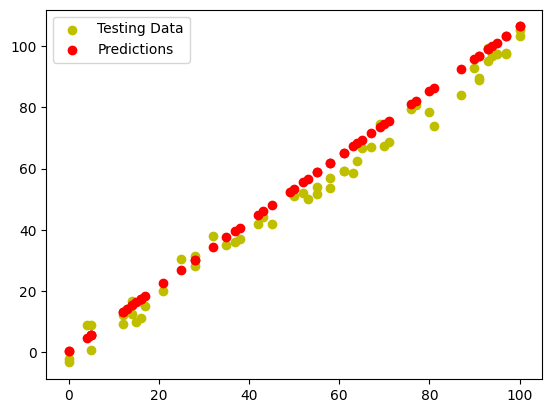

In [42]:
plt.scatter(X_test,y_test,c='y',label="Testing Data")
plt.scatter(X_test,y_predictions,c='r',label="Predictions")
plt.legend()
plt.show()

In [43]:
model.evaluate(X_test,y_test)#Direfctly gives test set, no need to feed predictions to evalaute funtion, which is a predefined method.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.0108 - mae: 4.0108


[4.010809898376465, 4.010809898376465]

In [44]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_predictions))# y_test is one dimention. y_predictions in two dimension. we use squeeze method to convert y_predictions into one dimension. 
mae_value = mae_metric.result().numpy()
print("MAE:", mae_value)
#squeeze used to make y predictions in to 1D format, becuase it is in the 2D format

MAE: 4.0108094


In [45]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_predictions))
mse_value = mse_metric.result().numpy()
print("MSE:", mse_value)

MSE: 22.769316


In [46]:
history.history#gives the loss values of each epoch.

{'loss': [38.12150955200195,
  13.496021270751953,
  7.100178241729736,
  4.162130355834961],
 'mae': [38.12150955200195,
  13.496021270751953,
  7.100178241729736,
  4.162130355834961]}

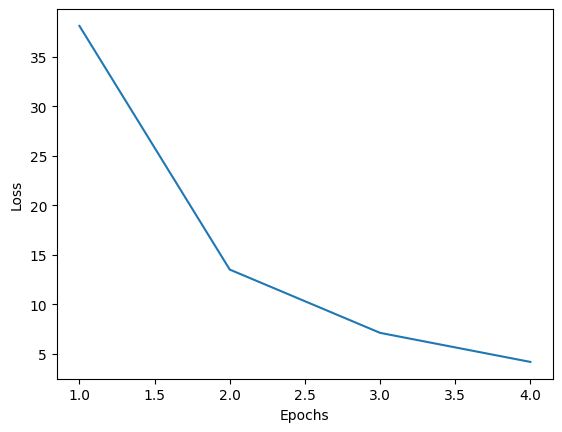

In [47]:
x_range=range(1,epoch_number+1)
plt.plot(x_range,history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [48]:
#weight values and biased terms of the each neuron inside layers.
for layer in model.layers:
    weights=layer.get_weights()[0]
    biases=layer.get_weights()[1]
    print(f"\nWeights:\n{weights}\n\nBiased:\n{biases}")


Weights:
[[ 0.1455758   0.2821193  -0.1307743   0.0755435  -0.33160752 -0.29953015
   0.06291818 -0.23616476 -0.28500977 -0.41165665 -0.11354597  0.39750838
   0.01447149  0.01455809 -0.19973755  0.01277393  0.07401721 -0.2702442
   0.13423678 -0.17172775  0.2507762  -0.0053494   0.17021996  0.34600767
   0.25065067 -0.26143566  0.26104072 -0.15150233  0.2018349   0.01850464
  -0.00661597 -0.25970158]]

Biased:
[-0.07974295 -0.09505481 -0.01162452  0.02854729  0.08785594  0.07918197
  0.02658339 -0.03155675 -0.03124755 -0.0193795  -0.0004155   0.03013247
  0.11173155  0.05200241  0.05569851  0.1088201  -0.15447998 -0.03131935
 -0.160788   -0.0286251  -0.0825215   0.08921538 -0.00207976  0.03136875
 -0.00115763 -0.00461484 -0.06527527  0.15598455 -0.12920897 -0.10028244
 -0.08201343  0.10582849]

Weights:
[[-0.3416999  -0.2686951   0.29785612 -0.07400783  0.1374904   0.05220289
   0.15833598  0.25581285 -0.23657672 -0.18059333]
 [ 0.28828618 -0.15557037  0.35279834 -0.31097448 -0.16089